In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

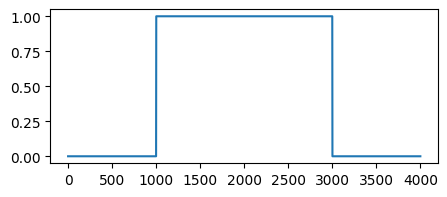

In [2]:
signal = np.heaviside(np.arange(-1000, 1000),1)
signal = np.concatenate((signal, signal[::-1]))
fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(signal)

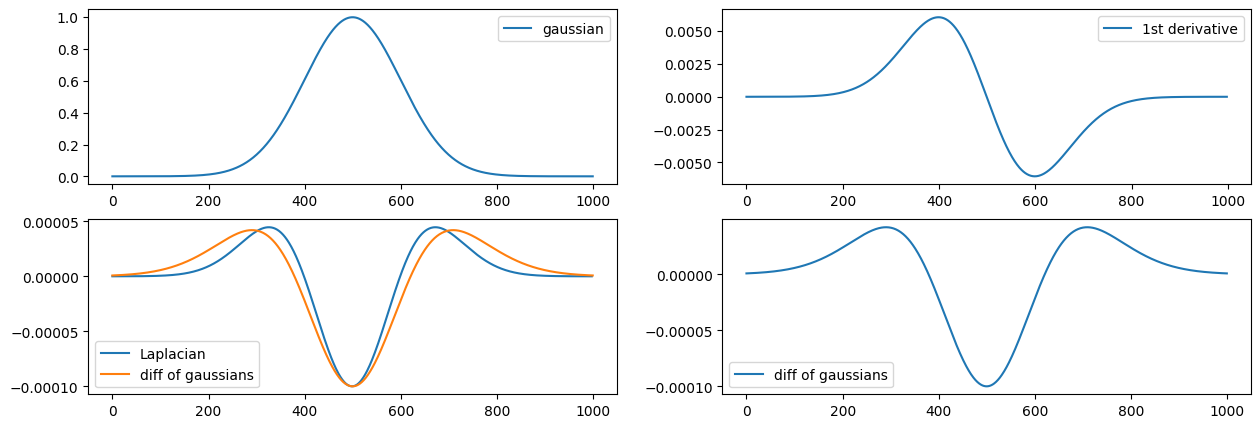

In [3]:
from numpy import diff

gaussian = sp.signal.gaussian(1000, 100)

d_gaussian = diff(gaussian)
d2_gaussian = diff(d_gaussian)

diff_gaussian = (sp.signal.gaussian(1000, 150) - 1.5*sp.signal.gaussian(1000, 100)) / (0.5*10000)

fig, ax = plt.subplots(2, 2, figsize=(15, 5))
ax[0][0].plot(gaussian, label='gaussian')
ax[0][1].plot(d_gaussian, label='1st derivative')
ax[1][0].plot(d2_gaussian, label='Laplacian')
ax[1][0].plot(diff_gaussian, label='diff of gaussians')
ax[1][1].plot(diff_gaussian, label='diff of gaussians')
for i in ax.flatten():
    i.legend()

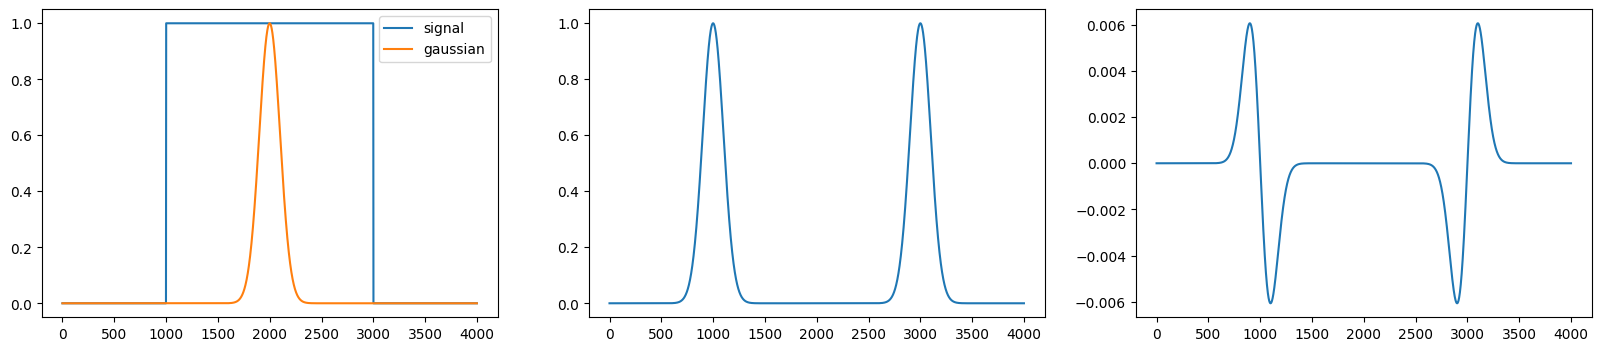

In [4]:
signal_d_gaussian = abs(np.convolve(signal, d_gaussian, mode='same'))
signal_d2_gaussian = np.convolve(signal, d2_gaussian, mode='same')

fig, ax = plt.subplots(1, 3, figsize=(20, 4))
ax[0].plot(signal, label='signal')
ax[0].plot(np.pad(gaussian, 1500, mode='constant'), label='gaussian')
ax[0].legend()
ax[1].plot(signal_d_gaussian)
ax[2].plot(signal_d2_gaussian)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

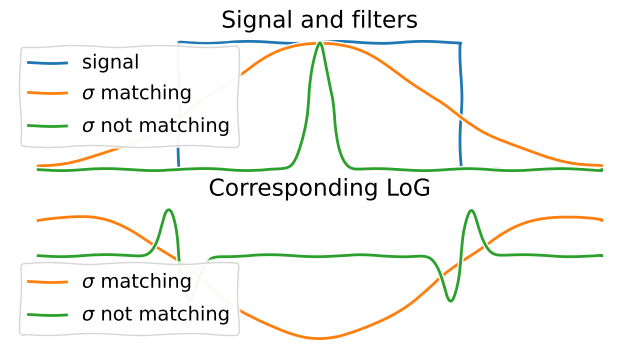

In [5]:
with plt.xkcd():
    x_axis = np.arange(0, 4000)
    sigma1 = 750
    sigma2 = 75
    gaussian = np.exp(-(x_axis-2000)**2 / (2*sigma1**2))
    gaussian2 =np.exp(-(x_axis-2000)**2 / (2*sigma2**2))
    #gaussian = sp.signal.gaussian(4000, 1000)
    #gaussian2 = sp.signal.gaussian(4000, 200)
    d_gaussian = diff(gaussian)
    d_gaussian2 = diff(gaussian2)
    d2_gaussian = diff(d_gaussian)
    d2_gaussian2 = diff(d_gaussian2)
    signal_d2_gaussian = np.convolve(signal, d2_gaussian, mode='same')
    signal_d2_gaussian2 = 0.1*np.convolve(signal, d2_gaussian2, mode='same')

    fig, ax = plt.subplots(2, 1, figsize=(8, 4))
    ax[0].plot(signal, label='signal')
    ax[0].plot(gaussian, label='$\sigma$ matching')
    ax[0].plot(gaussian2, label='$\sigma$ not matching')
    ax[0].legend()
    ax[0].set_title('Signal and filters')
    ax[0].axis('off')
    ax[1].set_title('Corresponding LoG')
    ax[1].plot(signal_d2_gaussian, label='$\sigma$ matching', c='C1') 
    ax[1].plot(signal_d2_gaussian2, label='$\sigma$ not matching', c='C2')
    ax[1].legend()
    ax[1].axis('off')
plt.show()